# PREDICCION DE LA DESERCION UNIVERSITARIA

### IMPORTAR LIBRERIAS

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # para dividir el conjunto de datos para el entrenamiento y la prueba
from sklearn import metrics # para comprobar la precisión del modelo
from sklearn.tree import DecisionTreeClassifier # Árbol de decisión
from sklearn.linear_model import LogisticRegression # Regresión Logística
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score 
from xgboost import XGBClassifier

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

### IMPORTANDO LA DATA

In [3]:
database_test = pd.read_csv("datasets/universitydropout-Test.csv")
database_train = pd.read_csv("datasets/universitydropout-Train.csv")

In [4]:
database_test.head()

,ID,EDAD,GENERO,CICLO,PROMEDIO_DE_NOTAS,DESAPROBO,INTERES,CONECTIVIDAD,ENFERMEDAD,FAMILIAR_ENFERMO,SOSTEN_FAMILIAR,GESTACION,INGRESO_FAMILIAR
0,47,45,1,6,16.8,0,4,2,0,0,1,0,1200
1,174,45,1,7,19.0,0,4,2,0,1,0,1,1500
2,626,45,0,7,12.0,1,3,1,1,1,1,0,1500
3,784,45,0,8,17.2,0,4,1,0,1,1,0,2200
4,813,45,1,8,16.5,0,4,2,1,1,1,1,1800


In [5]:

database_train.head()

,ID,EDAD,GENERO,CICLO,PROMEDIO_DE_NOTAS,DESAPROBO,INTERES,CONECTIVIDAD,ENFERMEDAD,FAMILIAR_ENFERMO,SOSTEN_FAMILIAR,GESTACION,INGRESO_FAMILIAR,DESERCION
0,47,45,1,6,16.8,0,4,2,0,0,1,0,1200,0
1,174,45,1,7,19.0,0,4,2,0,1,0,1,1500,1
2,626,45,0,7,12.0,1,3,1,1,1,1,0,1500,1
3,784,45,0,8,17.2,0,4,1,0,1,1,0,2200,1
4,813,45,1,8,16.5,0,4,2,1,1,1,1,1800,0


### EXPLORACION DE LOS DATOS

#### Verificar la cantidad de datos en los datasets

In [6]:
database_test.shape

(1500, 13)

In [7]:
database_train.shape

(1500, 14)

#### Verificar el tipo de dato en ambos datasets

In [8]:
database_test.dtypes

ID                     int64
EDAD                   int64
GENERO                 int64
CICLO                  int64
PROMEDIO_DE_NOTAS    float64
DESAPROBO              int64
INTERES                int64
CONECTIVIDAD           int64
ENFERMEDAD             int64
FAMILIAR_ENFERMO       int64
SOSTEN_FAMILIAR        int64
GESTACION              int64
INGRESO_FAMILIAR       int64
dtype: object

In [9]:
database_train.dtypes

ID                     int64
EDAD                   int64
GENERO                 int64
CICLO                  int64
PROMEDIO_DE_NOTAS    float64
DESAPROBO              int64
INTERES                int64
CONECTIVIDAD           int64
ENFERMEDAD             int64
FAMILIAR_ENFERMO       int64
SOSTEN_FAMILIAR        int64
GESTACION              int64
INGRESO_FAMILIAR       int64
DESERCION              int64
dtype: object

#### Revision de datos nulos

In [10]:
pd.isnull(database_test).sum()

ID                   0
EDAD                 0
GENERO               0
CICLO                0
PROMEDIO_DE_NOTAS    0
DESAPROBO            0
INTERES              0
CONECTIVIDAD         0
ENFERMEDAD           0
FAMILIAR_ENFERMO     0
SOSTEN_FAMILIAR      0
GESTACION            0
INGRESO_FAMILIAR     0
dtype: int64

In [11]:
pd.isnull(database_train).sum()

ID                   0
EDAD                 0
GENERO               0
CICLO                0
PROMEDIO_DE_NOTAS    0
DESAPROBO            0
INTERES              0
CONECTIVIDAD         0
ENFERMEDAD           0
FAMILIAR_ENFERMO     0
SOSTEN_FAMILIAR      0
GESTACION            0
INGRESO_FAMILIAR     0
DESERCION            0
dtype: int64

#### Revision de las estadisticas de ambos datasets


In [12]:
database_test.describe()

,ID,EDAD,GENERO,CICLO,PROMEDIO_DE_NOTAS,DESAPROBO,INTERES,CONECTIVIDAD,ENFERMEDAD,FAMILIAR_ENFERMO,SOSTEN_FAMILIAR,GESTACION,INGRESO_FAMILIAR
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,750.500000,19.633333,0.498667,2.948667,15.484267,0.268000,3.580000,1.505333,0.521333,0.490667,0.472000,0.495333,1132.373333
std,433.157015,7.058997,0.500165,2.201499,2.059173,0.443065,1.082149,0.578095,0.499711,0.500080,0.499382,0.500145,301.400501
min,1.000000,16.000000,0.000000,1.000000,12.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,800.000000
25%,375.750000,16.000000,0.000000,1.000000,13.700000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,900.000000
50%,750.500000,17.000000,0.000000,2.000000,15.500000,0.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1000.000000
75%,1125.250000,18.000000,1.000000,4.000000,17.300000,1.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1300.000000
max,1500.000000,45.000000,1.000000,10.000000,19.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2200.000000


In [13]:
database_train.describe()

,ID,EDAD,GENERO,CICLO,PROMEDIO_DE_NOTAS,DESAPROBO,INTERES,CONECTIVIDAD,ENFERMEDAD,FAMILIAR_ENFERMO,SOSTEN_FAMILIAR,GESTACION,INGRESO_FAMILIAR,DESERCION
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,750.500000,19.633333,0.498667,2.948667,15.484267,0.268000,3.580000,1.505333,0.521333,0.490667,0.472000,0.495333,1132.373333,0.401333
std,433.157015,7.058997,0.500165,2.201499,2.059173,0.443065,1.082149,0.578095,0.499711,0.500080,0.499382,0.500145,301.400501,0.490332
min,1.000000,16.000000,0.000000,1.000000,12.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,800.000000,0.000000
25%,375.750000,16.000000,0.000000,1.000000,13.700000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,900.000000,0.000000
50%,750.500000,17.000000,0.000000,2.000000,15.500000,0.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1000.000000,0.000000
75%,1125.250000,18.000000,1.000000,4.000000,17.300000,1.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1300.000000,1.000000
max,1500.000000,45.000000,1.000000,10.000000,19.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2200.000000,1.000000


### PREPROCESAMIENTO DE LA DATA

#### Codificar los datos de INGRESO FAMILIAR

In [14]:
#Crear varios grupos de ingreso familiar segun nuestros datos
#Bandas: 500-1000, 1100-1500, 1600-2000, 2100-2500
rangoIngresos = [500, 1000, 1500, 2000, 2500]
namesRango= ['0','1', '2', '3']
database_test['INGRESO_FAMILIAR'] = pd.cut(database_test['INGRESO_FAMILIAR'], rangoIngresos, labels= namesRango)
database_train['INGRESO_FAMILIAR'] = pd.cut(database_train['INGRESO_FAMILIAR'], rangoIngresos, labels= namesRango)

In [15]:
database_test.head()

,ID,EDAD,GENERO,CICLO,PROMEDIO_DE_NOTAS,DESAPROBO,INTERES,CONECTIVIDAD,ENFERMEDAD,FAMILIAR_ENFERMO,SOSTEN_FAMILIAR,GESTACION,INGRESO_FAMILIAR
0,47,45,1,6,16.8,0,4,2,0,0,1,0,1
1,174,45,1,7,19.0,0,4,2,0,1,0,1,1
2,626,45,0,7,12.0,1,3,1,1,1,1,0,1
3,784,45,0,8,17.2,0,4,1,0,1,1,0,3
4,813,45,1,8,16.5,0,4,2,1,1,1,1,2


In [16]:
database_train.head()

,ID,EDAD,GENERO,CICLO,PROMEDIO_DE_NOTAS,DESAPROBO,INTERES,CONECTIVIDAD,ENFERMEDAD,FAMILIAR_ENFERMO,SOSTEN_FAMILIAR,GESTACION,INGRESO_FAMILIAR,DESERCION
0,47,45,1,6,16.8,0,4,2,0,0,1,0,1,0
1,174,45,1,7,19.0,0,4,2,0,1,0,1,1,1
2,626,45,0,7,12.0,1,3,1,1,1,1,0,1,1
3,784,45,0,8,17.2,0,4,1,0,1,1,0,3,1
4,813,45,1,8,16.5,0,4,2,1,1,1,1,2,0


#### Eliminando la columna GESTACION

In [17]:
database_test.drop(['GESTACION'], axis=1, inplace=True)
database_train.drop(['GESTACION'], axis=1, inplace=True)

In [18]:
database_test.head()

,ID,EDAD,GENERO,CICLO,PROMEDIO_DE_NOTAS,DESAPROBO,INTERES,CONECTIVIDAD,ENFERMEDAD,FAMILIAR_ENFERMO,SOSTEN_FAMILIAR,INGRESO_FAMILIAR
0,47,45,1,6,16.8,0,4,2,0,0,1,1
1,174,45,1,7,19.0,0,4,2,0,1,0,1
2,626,45,0,7,12.0,1,3,1,1,1,1,1
3,784,45,0,8,17.2,0,4,1,0,1,1,3
4,813,45,1,8,16.5,0,4,2,1,1,1,2


In [19]:
database_train.head()

,ID,EDAD,GENERO,CICLO,PROMEDIO_DE_NOTAS,DESAPROBO,INTERES,CONECTIVIDAD,ENFERMEDAD,FAMILIAR_ENFERMO,SOSTEN_FAMILIAR,INGRESO_FAMILIAR,DESERCION
0,47,45,1,6,16.8,0,4,2,0,0,1,1,0
1,174,45,1,7,19.0,0,4,2,0,1,0,1,1
2,626,45,0,7,12.0,1,3,1,1,1,1,1,1
3,784,45,0,8,17.2,0,4,1,0,1,1,3,1
4,813,45,1,8,16.5,0,4,2,1,1,1,2,0


##### Revision de datos nulos

In [20]:
pd.isnull(database_test).sum()

ID                   0
EDAD                 0
GENERO               0
CICLO                0
PROMEDIO_DE_NOTAS    0
DESAPROBO            0
INTERES              0
CONECTIVIDAD         0
ENFERMEDAD           0
FAMILIAR_ENFERMO     0
SOSTEN_FAMILIAR      0
INGRESO_FAMILIAR     0
dtype: int64

In [21]:
pd.isnull(database_train).sum()

ID                   0
EDAD                 0
GENERO               0
CICLO                0
PROMEDIO_DE_NOTAS    0
DESAPROBO            0
INTERES              0
CONECTIVIDAD         0
ENFERMEDAD           0
FAMILIAR_ENFERMO     0
SOSTEN_FAMILIAR      0
INGRESO_FAMILIAR     0
DESERCION            0
dtype: int64

#### Eliminar columna ID en el dataset de entrenamiento

In [22]:
database_train.drop(['ID'], axis=1, inplace=True)

In [23]:
database_test.drop(['ID'], axis=1, inplace=True)

#### Codificar los datos de CONECTIVIDAD

In [24]:
#Crear varios grupos del grado de conectividad segun nuestros datos
#Bandas: 0-1, 2-3
rangoConectividad = [0, 1, 2, 3]
namesRango= ['0','1', '2']
database_test['CONECTIVIDAD'] = pd.cut(database_test['CONECTIVIDAD'], rangoConectividad, labels= namesRango)
database_train['CONECTIVIDAD'] = pd.cut(database_train['CONECTIVIDAD'], rangoConectividad, labels= namesRango)

#### Verificar los datos

In [25]:
database_test.head()

,EDAD,GENERO,CICLO,PROMEDIO_DE_NOTAS,DESAPROBO,INTERES,CONECTIVIDAD,ENFERMEDAD,FAMILIAR_ENFERMO,SOSTEN_FAMILIAR,INGRESO_FAMILIAR
0,45,1,6,16.8,0,4,1,0,0,1,1
1,45,1,7,19.0,0,4,1,0,1,0,1
2,45,0,7,12.0,1,3,0,1,1,1,1
3,45,0,8,17.2,0,4,0,0,1,1,3
4,45,1,8,16.5,0,4,1,1,1,1,2


In [26]:
database_train.head()

,EDAD,GENERO,CICLO,PROMEDIO_DE_NOTAS,DESAPROBO,INTERES,CONECTIVIDAD,ENFERMEDAD,FAMILIAR_ENFERMO,SOSTEN_FAMILIAR,INGRESO_FAMILIAR,DESERCION
0,45,1,6,16.8,0,4,1,0,0,1,1,0
1,45,1,7,19.0,0,4,1,0,1,0,1,1
2,45,0,7,12.0,1,3,0,1,1,1,1,1
3,45,0,8,17.2,0,4,0,0,1,1,3,1
4,45,1,8,16.5,0,4,1,1,1,1,2,0


#### Revisar el tipo de datos de los campos codificados

In [27]:
database_test.dtypes

EDAD                    int64
GENERO                  int64
CICLO                   int64
PROMEDIO_DE_NOTAS     float64
DESAPROBO               int64
INTERES                 int64
CONECTIVIDAD         category
ENFERMEDAD              int64
FAMILIAR_ENFERMO        int64
SOSTEN_FAMILIAR         int64
INGRESO_FAMILIAR     category
dtype: object

In [28]:
database_train.dtypes

EDAD                    int64
GENERO                  int64
CICLO                   int64
PROMEDIO_DE_NOTAS     float64
DESAPROBO               int64
INTERES                 int64
CONECTIVIDAD         category
ENFERMEDAD              int64
FAMILIAR_ENFERMO        int64
SOSTEN_FAMILIAR         int64
INGRESO_FAMILIAR     category
DESERCION               int64
dtype: object

#### Cambiando los datos typo category a int

In [29]:
database_test[['CONECTIVIDAD', 'INGRESO_FAMILIAR']] = database_test[['CONECTIVIDAD', 'INGRESO_FAMILIAR']].astype('int64')

In [30]:
database_train[['CONECTIVIDAD', 'INGRESO_FAMILIAR']] = database_train[['CONECTIVIDAD', 'INGRESO_FAMILIAR']].astype('int64')

#### Revisar el tipo de datos

In [31]:
database_test.dtypes

EDAD                   int64
GENERO                 int64
CICLO                  int64
PROMEDIO_DE_NOTAS    float64
DESAPROBO              int64
INTERES                int64
CONECTIVIDAD           int64
ENFERMEDAD             int64
FAMILIAR_ENFERMO       int64
SOSTEN_FAMILIAR        int64
INGRESO_FAMILIAR       int64
dtype: object

In [32]:
database_train.dtypes

EDAD                   int64
GENERO                 int64
CICLO                  int64
PROMEDIO_DE_NOTAS    float64
DESAPROBO              int64
INTERES                int64
CONECTIVIDAD           int64
ENFERMEDAD             int64
FAMILIAR_ENFERMO       int64
SOSTEN_FAMILIAR        int64
INGRESO_FAMILIAR       int64
DESERCION              int64
dtype: object

<AxesSubplot:xlabel='DESERCION', ylabel='count'>

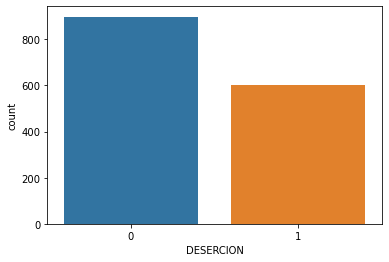

In [33]:
#Obteniendo de forma gráfica a través del método countplotlos los valores diferentes de la columna DESERCION y el número de veces que se repiten
#sns.countplot(database_train['DESERCION'])
sns.countplot(x = 'DESERCION', data = database_train)

In [34]:
#Obteniendo los valores diferentes de la columna DESERCION y el número de veces que se repiten
database_train['DESERCION'].value_counts()

0    898
1    602
Name: DESERCION, dtype: int64

#### Revision de las estadisticas de ambos datasets luego del Preprocesamiento

In [35]:
database_test.describe()

,EDAD,GENERO,CICLO,PROMEDIO_DE_NOTAS,DESAPROBO,INTERES,CONECTIVIDAD,ENFERMEDAD,FAMILIAR_ENFERMO,SOSTEN_FAMILIAR,INGRESO_FAMILIAR
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,19.633333,0.498667,2.948667,15.484267,0.268000,3.580000,0.505333,0.521333,0.490667,0.472000,0.590000
std,7.058997,0.500165,2.201499,2.059173,0.443065,1.082149,0.578095,0.499711,0.500080,0.499382,0.683773
min,16.000000,0.000000,1.000000,12.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,0.000000,1.000000,13.700000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17.000000,0.000000,2.000000,15.500000,0.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,18.000000,1.000000,4.000000,17.300000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,45.000000,1.000000,10.000000,19.000000,1.000000,5.000000,2.000000,1.000000,1.000000,1.000000,3.000000


In [36]:
database_train.describe()

,EDAD,GENERO,CICLO,PROMEDIO_DE_NOTAS,DESAPROBO,INTERES,CONECTIVIDAD,ENFERMEDAD,FAMILIAR_ENFERMO,SOSTEN_FAMILIAR,INGRESO_FAMILIAR,DESERCION
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,19.633333,0.498667,2.948667,15.484267,0.268000,3.580000,0.505333,0.521333,0.490667,0.472000,0.590000,0.401333
std,7.058997,0.500165,2.201499,2.059173,0.443065,1.082149,0.578095,0.499711,0.500080,0.499382,0.683773,0.490332
min,16.000000,0.000000,1.000000,12.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,0.000000,1.000000,13.700000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17.000000,0.000000,2.000000,15.500000,0.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,1.000000,4.000000,17.300000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,45.000000,1.000000,10.000000,19.000000,1.000000,5.000000,2.000000,1.000000,1.000000,1.000000,3.000000,1.000000


### APLICACION DE ALGORITMOS DE MACHINE LEARNING

#### Creando las variables predictoras X y nuestra variable objetivo Y

In [37]:
X = database_train.drop('DESERCION',axis=1)
y = database_train['DESERCION']

#### Dividimos cada variable para el entrenamiento del modelo

In [38]:

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size = 0.15,random_state=1) #Separa el 15% de la data para generar las predicciones

#### Revision del tamaño de datos de X y Y

In [39]:
print('Para el X_train:', X_train.shape, 'y para el y_train',y_train.shape)
print('Para el X_test:',X_test.shape,'y para el y_test',y_test.shape)

Para el X_train: (1275, 11) y para el y_train (1275,)
Para el X_test: (225, 11) y para el y_test (225,)


#### Entrenando el modelo con el algoritmo de Regresion Logística

In [40]:
logreg = LogisticRegression(random_state=1) #creamos la variable logreg para el modelo de regresión logística
logreg_fit=logreg.fit(X_train, y_train) #entrenamos el modelo de regresión logística usando los datos de X_train, y_train
logreg_pred = logreg_fit.predict(X_test) #generamos las predicciones con X_test usando el modelo de regresión logística 
                                                #Calculamos la probabilidades de obtener 1 (sí sobrevivió) con el método predict_proba
logreg_pred #mostramos las predicciones generadas 0 cuando no sobrevive 1 cuando sí sobrevive

D:\ProgramasDataScience\envs\UniversityDropout\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0], dtype=int64)

####  Imprimir el accuracy

In [43]:
print('El accuracy para mi primero modelo es :{0:.8f}'.format(accuracy_score(y_test,logreg_pred))) #usando la expresión regex .8f para mostrar 8 decimales

El accuracy para mi primero modelo es :0.71555556


#### Probabilidades de obtener 1 (sí desertó) con el método predict_proba

In [44]:
#Calculamos la probabilidades de obtener 1 (sí sobrevivió) con el método predict_proba
proba_pred_test = logreg.predict_proba(X_test)[:,1]
proba_pred_test

array([0.27997159, 0.71518809, 0.33538967, 0.38902092, 0.62763327,
       0.13413276, 0.13649801, 0.35616323, 0.17272632, 0.74634213,
       0.13860874, 0.27619173, 0.37241362, 0.36607298, 0.12955072,
       0.1640428 , 0.7206701 , 0.63688046, 0.12738149, 0.64666779,
       0.41633319, 0.39874897, 0.68064174, 0.39674906, 0.36776045,
       0.41659776, 0.1642065 , 0.70950985, 0.39053843, 0.69832584,
       0.4650075 , 0.44488789, 0.14019474, 0.74495646, 0.10359758,
       0.42756162, 0.35680448, 0.36240071, 0.61016876, 0.15521873,
       0.11372756, 0.28434319, 0.34787908, 0.69398948, 0.46142406,
       0.65202067, 0.14569896, 0.65371795, 0.31703775, 0.10346584,
       0.42208608, 0.39716285, 0.69924603, 0.69557411, 0.12489188,
       0.13808755, 0.4018305 , 0.10408293, 0.42353031, 0.73112529,
       0.39030814, 0.36566068, 0.3759587 , 0.73151627, 0.31695741,
       0.30728451, 0.40980725, 0.1310712 , 0.1376413 , 0.33744441,
       0.42838962, 0.17464061, 0.69464205, 0.16677852, 0.37754

#### Entrenando el modelo con el algoritmo de DecisionTreeClassifier

In [45]:
tree_clf = DecisionTreeClassifier(random_state=1) #creamos la variable tree_clf para el modelo de árbol de clasificación
clf_fit=tree_clf.fit(X_train,y_train) #entrenamos el modelo de árbol de clasificación usando los datos de X_train, y_train
tree_y_pred = clf_fit.predict(X_test)#generamos las predicciones con X_test usando el modelo de árbol de clasificación
tree_y_pred  #mostramos las predicciones generadas 0 cuando no deserta 1 cuando sí deserta

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1], dtype=int64)

#### Imprimir el accuracy

In [46]:
print('El accuracy para mi segundo modelo es :{0:.8f}'.format(accuracy_score(y_test,tree_y_pred))) #usando la expresión regex .8f para mostrar 8 decimales

El accuracy para mi segundo modelo es :0.61777778


#### Probabilidades de obtener 1 (sí desertó) con el método predict_proba

In [47]:
proba_pred_test = tree_clf.predict_proba(X_test)[:,1]
proba_pred_test

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 1.])

#### Entrenando el modelo con el algoritmo de RandomForestClassifier

In [48]:
rnd_clf = RandomForestClassifier(n_estimators = 1000, n_jobs = -1,max_depth=3,random_state=1) #creamos la variable tree_clf para el modelo de random forest
rdn_clf_fit=rnd_clf.fit(X_train,y_train) #entrenamos el modelo de random forest usando los datos de X_train, y_train
y_pred_rnd = rdn_clf_fit.predict(X_test) #generamos las predicciones con X_test usando el modelo de random forest
y_pred_rnd #mostramos las predicciones generadas 0 cuando no deserta 1 cuando sí deserta

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0], dtype=int64)

#### Imprimir el accuracy

In [49]:
print('El accuracy para mi tercer modelo es :{0:.8f}'.format(accuracy_score(y_test,y_pred_rnd))) #usando la expresión regex .8f para mostrar 8 decimales

El accuracy para mi tercer modelo es :0.72000000


#### Probabilidades de obtener 1 (sí desertó) con el método predict_proba

In [50]:
proba_pred_test = rnd_clf.predict_proba(X_test)[:,1]
proba_pred_test

array([0.35331209, 0.55257478, 0.36024296, 0.35878284, 0.58359402,
       0.25496703, 0.25087302, 0.36753438, 0.25387017, 0.56124297,
       0.24565072, 0.38896981, 0.36370208, 0.35842877, 0.24205053,
       0.2626156 , 0.54406561, 0.55105049, 0.25189837, 0.54767498,
       0.36273006, 0.42732307, 0.59248524, 0.40682237, 0.33621676,
       0.37092188, 0.2574689 , 0.57061145, 0.40957639, 0.56880765,
       0.44346654, 0.38641089, 0.25116989, 0.59292413, 0.23714981,
       0.36661843, 0.36017393, 0.36354635, 0.48819436, 0.25671024,
       0.23984726, 0.38301434, 0.35432682, 0.55561771, 0.42188984,
       0.5511211 , 0.24771436, 0.54145256, 0.38080374, 0.23032297,
       0.36456978, 0.36447561, 0.59313813, 0.55674562, 0.30207024,
       0.24796887, 0.37867128, 0.25414468, 0.40788955, 0.5758785 ,
       0.36270289, 0.36667255, 0.3586742 , 0.58792593, 0.37887846,
       0.34140494, 0.3930884 , 0.23352481, 0.24917436, 0.36035838,
       0.36465724, 0.29980259, 0.55853129, 0.25530752, 0.36132

#### XGBoost

In [61]:
xgb_model = XGBClassifier(eta=0.1, 
                                  max_depth=8, 
                                  colsample_bytree=0.5, 
                                  scale_pos_weight=1.1, 
                                  booster='gbtree', 
                                  use_label_encoder=False,
                                  eval_metric='mlogloss')
xgb_fit = xgb_model.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))
xgb_pred = xgb_fit.predict(X_test._get_numeric_data())
(y_test, xgb_pred )


(91      1
 75      0
 1264    1
 330     1
 1349    1
        ..
 943     0
 1471    1
 661     1
 1135    1
 1171    0
 Name: DESERCION, Length: 225, dtype: int64,
 array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
        0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
        1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
        0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 1, 1]))

In [62]:
print('El accuracy para mi cuarto modelo es :{0:.8f}'.format(accuracy_score(y_test, xgb_pred ))) #usando la expresión regex .8f para mostrar 8 decimales

El accuracy para mi cuarto modelo es :0.68000000


#### Curva ROC para todos los modelos

##### Creamos la variable clasificadores para guardar los modelos actualizados

In [63]:
clasificadores = [logreg_fit, clf_fit, rdn_clf_fit, xgb_fit] 

#### Creamos una función para obtener los parámetros de la curva ROC para cada uno de los modelos actualizados

In [64]:
tabla_resultados = pd.DataFrame(columns=['clasificadores', 'fpr','tpr','auc'])
for cls in clasificadores:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, yproba)
    auc = roc_auc_score(y_test, yproba)
    tabla_resultados = tabla_resultados.append({'clasificadores':None,'fpr':fpr,'tpr':tpr,'auc':auc}, ignore_index=True)

D:\ProgramasDataScience\envs\UniversityDropout\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Mostramos la tabla_resultados declarando como índices el nombre de cada uno de los modelos


In [65]:
tabla_resultados['clasificadores'] = ['regresion_logistica','arbol_clasificacion','random_forest', 'XgBoost']
tabla_resultados.set_index('clasificadores', inplace=True)
tabla_resultados

,fpr,tpr,auc
clasificadores,,,
regresion_logistica,"[0.0, 0.007751937984496124, 0.0077519379844961...","[0.0, 0.0, 0.020833333333333332, 0.02083333333...",0.726663
arbol_clasificacion,"[0.0, 0.35658914728682173, 1.0]","[0.0, 0.5833333333333334, 1.0]",0.613372
random_forest,"[0.0, 0.0, 0.0, 0.007751937984496124, 0.007751...","[0.0, 0.010416666666666666, 0.03125, 0.03125, ...",0.717862
XgBoost,"[0.0, 0.0, 0.0, 0.03875968992248062, 0.0387596...","[0.0, 0.010416666666666666, 0.0208333333333333...",0.671512


#### Dibujamos la curva ROC con los parámetros obtenidos para cada uno de los modelos actualizados


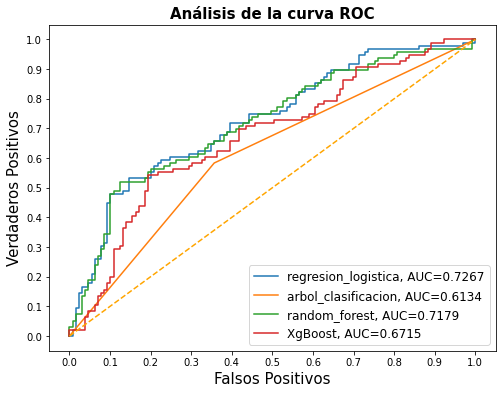

In [66]:
fig = plt.figure(figsize=(8,6))

for i in tabla_resultados.index:
    plt.plot(tabla_resultados.loc[i]['fpr'], 
             tabla_resultados.loc[i]['tpr'], 
             label="{}, AUC={:.4f}".format(i, tabla_resultados.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Falsos Positivos", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Verdaderos Positivos", fontsize=15)

plt.title('Análisis de la curva ROC', fontweight='bold', fontsize=15)
plt.legend(prop={'size':12}, loc='lower right')

plt.show()

#### Variamos la profundidad de las ramas de los árboles de clasificación

In [67]:
for i in range(1,10):
    tree_clf = DecisionTreeClassifier(max_depth=i)
    tree_clf.fit(X_train,y_train)
    y_pred = tree_clf.predict(X_test)
    print("Mi árbol da un accuracy de:", accuracy_score(y_test,y_pred), "cuando su max_depth es: ", i)

Mi árbol da un accuracy de: 0.6533333333333333 cuando su max_depth es:  1
Mi árbol da un accuracy de: 0.7155555555555555 cuando su max_depth es:  2
Mi árbol da un accuracy de: 0.7066666666666667 cuando su max_depth es:  3
Mi árbol da un accuracy de: 0.7155555555555555 cuando su max_depth es:  4
Mi árbol da un accuracy de: 0.72 cuando su max_depth es:  5
Mi árbol da un accuracy de: 0.6711111111111111 cuando su max_depth es:  6
Mi árbol da un accuracy de: 0.6577777777777778 cuando su max_depth es:  7
Mi árbol da un accuracy de: 0.6711111111111111 cuando su max_depth es:  8
Mi árbol da un accuracy de: 0.6088888888888889 cuando su max_depth es:  9


In [68]:
for i in range(1,10):
    rnd_clf = RandomForestClassifier(max_depth=i)
    rnd_clf.fit(X_train,y_train)
    y_pred = rnd_clf.predict(X_test)
    print("Mi árbol da un accuracy de:", accuracy_score(y_test,y_pred), "cuando su max_depth es: ", i)

Mi árbol da un accuracy de: 0.5733333333333334 cuando su max_depth es:  1
Mi árbol da un accuracy de: 0.6888888888888889 cuando su max_depth es:  2
Mi árbol da un accuracy de: 0.72 cuando su max_depth es:  3
Mi árbol da un accuracy de: 0.72 cuando su max_depth es:  4
Mi árbol da un accuracy de: 0.7155555555555555 cuando su max_depth es:  5
Mi árbol da un accuracy de: 0.72 cuando su max_depth es:  6
Mi árbol da un accuracy de: 0.72 cuando su max_depth es:  7
Mi árbol da un accuracy de: 0.7111111111111111 cuando su max_depth es:  8
Mi árbol da un accuracy de: 0.7022222222222222 cuando su max_depth es:  9


In [69]:
for i in range(1,10):
    # use_label_encoder=False
    xgb_model = XGBClassifier(max_depth=i, use_label_encoder=False)
    xgb_model.fit(X_train,y_train)
    y_pred = xgb_model.predict(X_test)
    print("Mi árbol da un accuracy de:", accuracy_score(y_test,y_pred), "cuando su max_depth es: ", i)

[16:25:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Mi árbol da un accuracy de: 0.7155555555555555 cuando su max_depth es:  1
[16:25:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Mi árbol da un accuracy de: 0.6711111111111111 cuando su max_depth es:  2
[16:25:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Mi árbol da un accuracy de: 0.6755555555555556 cuando su max_depth es:  3
[16:25:35] WARNING: ..

#### Actualización de los arboles de clasificacion

#### DecisionTreeClassifier

In [72]:
tree_clf_N = DecisionTreeClassifier(max_depth=5)
tree_clf_2=tree_clf_N.fit(X_train,y_train)
predicciones_nuevo_md_DTC = tree_clf_2.predict(X_test)
print('El accuracy para mi tercer modelo es :{0:.8f}'.format(accuracy_score(y_test,predicciones_nuevo_md_DTC))) #usando la expresión regex .8f para mostrar 8 decimales

El accuracy para mi tercer modelo es :0.72000000


[]

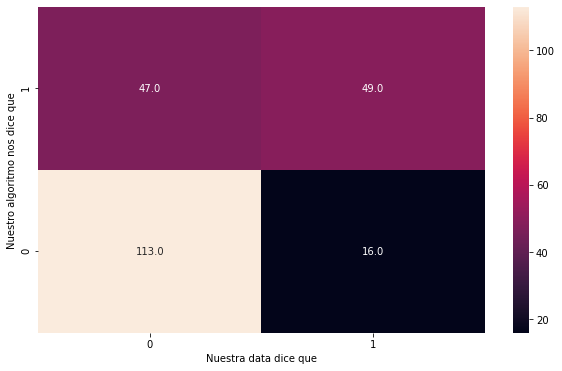

In [73]:
matriz_confusion = confusion_matrix(y_test,predicciones_nuevo_md_DTC)

plt.figure(figsize=(10,6))
ax=sns.heatmap(matriz_confusion, annot = True, annot_kws={"size": 10}, fmt=".1f")
ax.set_ylim((0,2))
plt.xlabel('Nuestra data dice que')
plt.ylabel('Nuestro algoritmo nos dice que')
plt.plot()

#### RandomForestClassifier

In [74]:
rnd_clf_N = RandomForestClassifier(max_depth=3)
rnd_clf_2=rnd_clf_N.fit(X_train,y_train)
predicciones_nuevo_md_RFC = rnd_clf_2.predict(X_test)
print('El accuracy para mi tercer modelo es :{0:.8f}'.format(accuracy_score(y_test,predicciones_nuevo_md_RFC))) #usando la expresión regex .8f para mostrar 8 decimales

El accuracy para mi tercer modelo es :0.72000000


#### Matriz de confusion

[]

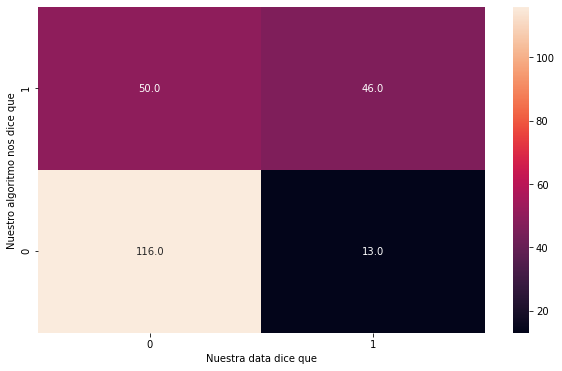

In [131]:
matriz_confusion = confusion_matrix(y_test,predicciones_nuevo_md_RFC)

plt.figure(figsize=(10,6))
ax=sns.heatmap(matriz_confusion, annot = True, annot_kws={"size": 10}, fmt=".1f")
ax.set_ylim((0,2))
plt.xlabel('Nuestra data dice que')
plt.ylabel('Nuestro algoritmo nos dice que')
plt.plot()

#### XGBoost

In [80]:
xgb_model_N = XGBClassifier(max_depth=1)
xgb_model_2=xgb_model_N.fit(X_train,y_train)
predicciones_nuevo_md_xgb = xgb_model_2.predict(X_test)
print('El accuracy para mi tercer modelo es :{0:.8f}'.format(accuracy_score(y_test,predicciones_nuevo_md_xgb))) #usando la expresión regex .8f para mostrar 8 decimales

[16:27:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
El accuracy para mi tercer modelo es :0.71555556


D:\ProgramasDataScience\envs\UniversityDropout\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


#### Matriz de confusion

[]

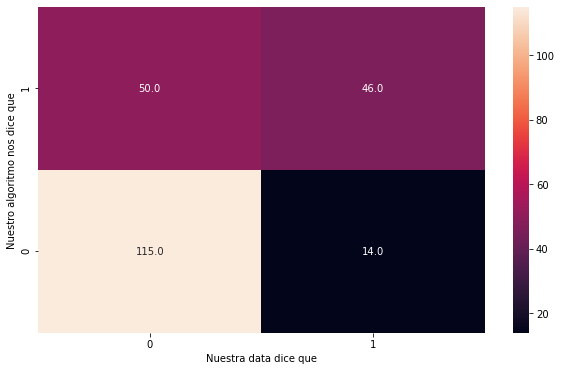

In [81]:
matriz_confusion = confusion_matrix(y_test,predicciones_nuevo_md_xgb)

plt.figure(figsize=(10,6))
ax=sns.heatmap(matriz_confusion, annot = True, annot_kws={"size": 10}, fmt=".1f")
ax.set_ylim((0,2))
plt.xlabel('Nuestra data dice que')
plt.ylabel('Nuestro algoritmo nos dice que')
plt.plot()

### Evaluación de modelos optimizados

#### Definimos una lista de métricas y creamos una función para calcular todas las métricas

In [123]:
lista_metricas=[accuracy_score,precision_score,recall_score,f1_score,roc_auc_score]
def calcula_scores_modelo(score_modelo_nlp,real,prediccion):
  for metrica in lista_metricas: score_modelo_nlp.append(metrica(real, prediccion))

#### Calculamos todas las métricas para el modelo de Regresión Logística

In [124]:
score_rl=[]
calcula_scores_modelo(score_rl,y_test,logreg_pred)

#### Calculamos todas las métricas para el modelo de DecisionTreeClassifier optimizado

In [125]:
score_tcl=[]
calcula_scores_modelo(score_tcl,y_test,predicciones_nuevo_md_DTC)

#### Calculamos todas las métricas para el modelo de RandomForestClassifier optimizado

In [126]:
score_rfc=[]
calcula_scores_modelo(score_rfc,y_test,predicciones_nuevo_md_RFC)

#### Calculamos todas las métricas para el modelo de XGBoost optimizado

In [127]:
score_xgb=[]
calcula_scores_modelo(score_xgb,y_test, predicciones_nuevo_md_xgb)

#### Generamos una tabla donde se consolide todos los indicadores

In [128]:
tabla_score = {'RegLogistica': score_rl,
               'DecisionTreeClassifier': score_tcl,
               'RandomForest': score_rfc,
               'XGBoost': score_xgb}
tabla_score = pd.DataFrame(tabla_score)  
tabla_score.index = ['accuracy_score','precision_score','recall_score','f1_score','roc_auc_score']
tabla_score

,RegLogistica,DecisionTreeClassifier,RandomForest,XGBoost
accuracy_score,0.715556,0.720000,0.720000,0.715556
precision_score,0.766667,0.753846,0.779661,0.766667
recall_score,0.479167,0.510417,0.479167,0.479167
f1_score,0.589744,0.608696,0.593548,0.589744
roc_auc_score,0.685320,0.693193,0.689196,0.685320


### Curva ROC para todos los modelos optimizados

#### Creamos la variable clasificadoresOptimizados para guardar los modelos optimizados

In [107]:
clasificadoresOptimizados = [logreg_fit, tree_clf_2, rnd_clf_2, xgb_model_2] 

#### Creamos una función para obtener los parámetros de la curva ROC para cada uno de los modelos optimizados

In [119]:
tabla_resultados_optimizados = pd.DataFrame(columns=['clasificadores', 'fpr','tpr','auc'])
for cls in clasificadoresOptimizados:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, yproba)
    auc = roc_auc_score(y_test, yproba)
    tabla_resultados_optimizados = tabla_resultados_optimizados.append({'clasificadores':None,'fpr':fpr,'tpr':tpr,'auc':auc}, ignore_index=True)

D:\ProgramasDataScience\envs\UniversityDropout\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[20:14:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\ProgramasDataScience\envs\UniversityDropout\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


#### Mostramos la tabla_resultados_optimizados declarando como índices el nombre de cada uno de los modelos

In [120]:
tabla_resultados_optimizados['clasificadores'] = ['regresion_logistica','arbol_clasificacion','random_forest', 'XgBoost']
tabla_resultados_optimizados.set_index('clasificadores', inplace=True)
tabla_resultados_optimizados

,fpr,tpr,auc
clasificadores,,,
regresion_logistica,"[0.0, 0.007751937984496124, 0.0077519379844961...","[0.0, 0.0, 0.020833333333333332, 0.02083333333...",0.726663
arbol_clasificacion,"[0.0, 0.0, 0.03875968992248062, 0.046511627906...","[0.0, 0.010416666666666666, 0.15625, 0.1770833...",0.709827
random_forest,"[0.0, 0.0, 0.0, 0.007751937984496124, 0.007751...","[0.0, 0.010416666666666666, 0.0625, 0.0625, 0....",0.721697
XgBoost,"[0.0, 0.0, 0.015503875968992248, 0.01550387596...","[0.0, 0.010416666666666666, 0.0104166666666666...",0.729530


#### Dibujamos la curva ROC con los parámetros obtenidos para cada uno de los modelos optimizados

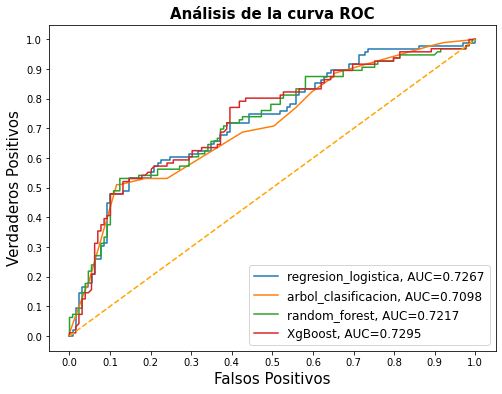

In [129]:
fig = plt.figure(figsize=(8,6))

for i in tabla_resultados_optimizados.index:
    plt.plot(tabla_resultados_optimizados.loc[i]['fpr'], 
             tabla_resultados_optimizados.loc[i]['tpr'], 
             label="{}, AUC={:.4f}".format(i, tabla_resultados_optimizados.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Falsos Positivos", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Verdaderos Positivos", fontsize=15)

plt.title('Análisis de la curva ROC', fontweight='bold', fontsize=15)
plt.legend(prop={'size':12}, loc='lower right')

plt.show()

### PREDICCION UTILIZANDO LOS MODELOS

In [88]:
test_predecida=rnd_clf_2.predict(database_test)
test_predecida

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [98]:
#Extraer los Id de la data de origen
origen = pd.read_csv('datasets/universitydropout.csv')
origen_id=origen['ID']

In [99]:
#Comprobar que el tamaño de las predicciones y id_origen coincidan para unir ambos dataset sin errores
test_predecida.shape, origen_id.shape

((1500,), (1500,))

In [100]:
"CELDA N°74"
#Crear un diccionario para guardar ambos dataset y crear un nuevo dataframe llamado PrediccionesDesercion para unir ambos dataset
prediccion_dict = {'ID':origen_id,'DESERCION':test_predecida}
PrediccionesDesercion = pd.DataFrame(prediccion_dict)

In [101]:
#Generar un archivo csv con tu nombre -no olvidar la extensión csv
PrediccionesDesercion.to_csv('Prediccion.csv',index=False)

In [102]:
prediccion = pd.read_csv('Prediccion.csv')

In [106]:
prediccion.head(50)

,ID,DESERCION
0,47,0
1,174,0
2,626,1
3,784,0
4,813,1
5,893,0
6,1011,0
7,280,0
8,446,0
9,465,0
